This radar plot displays the normalized average physical activity frequency per week across different obesity categories using a circular spider layout. The distance from the center represents activity levels, scaled as a percentage of the most active group (100%). Groups closer to the center indicate lower activity, often corresponding to higher obesity severity. This visualization highlights the inverse relationship between physical activity and obesity severity, showing that individuals in higher obesity categories typically engage in less physical activity. These insights emphasize the importance of promoting physical activity to reduce obesity risk and improve health outcomes. For insurance companies, understanding these patterns can inform risk assessments, guide premium calculations, and support the development of targeted wellness programs aimed at reducing long-term healthcare costs. The plot was created using a radar (spider) chart with Matplotlib’s polar plot functionality.

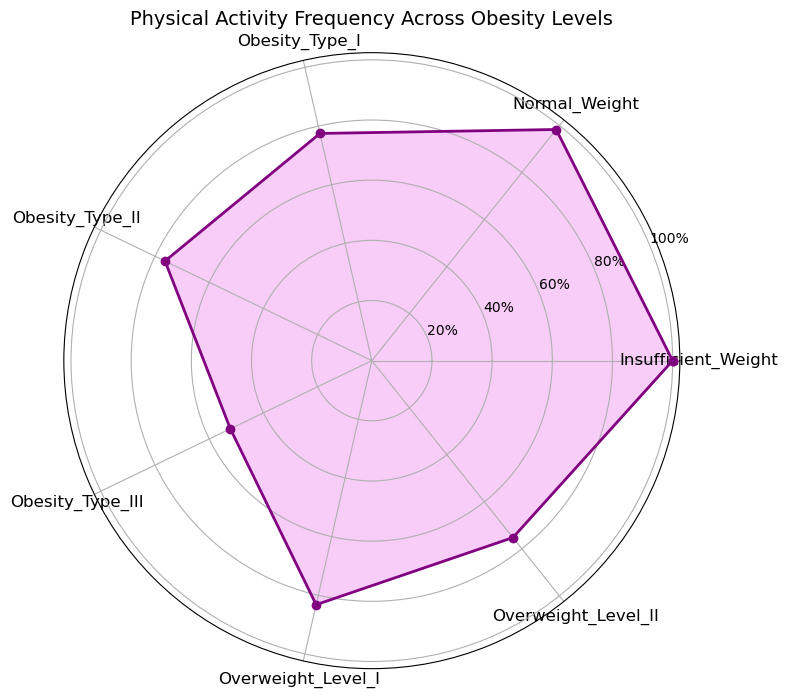

In [19]:
# Contributor: Richard Harkness (GitHub: @Rarkness)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = 'data/Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Group and normalize
activity_by_obesity = df.groupby('NObeyesdad')['FAF'].mean().reset_index()
max_value = activity_by_obesity['FAF'].max()
activity_by_obesity['Normalized_FAF'] = activity_by_obesity['FAF'] / max_value * 5  # scale to 5 for better fill

# Prepare data for radar plot
categories = list(activity_by_obesity['NObeyesdad'])
values = activity_by_obesity['Normalized_FAF'].tolist()
values += values[:1]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='purple', linewidth=2, linestyle='solid', marker='o')
ax.fill(angles, values, color='violet', alpha=0.4)

ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

plt.title('Physical Activity Frequency Across Obesity Levels', size=14)
plt.show()
